In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Import Libraries

In [2]:
import numpy as np
import pandas as pd


from scipy import stats 
from scipy.interpolate import make_interp_spline
import seaborn as sns
import matplotlib.pyplot as plt

#Norhan
from xgboost import XGBRegressor
from sklearn import linear_model
from sklearn.ensemble import HistGradientBoostingRegressor
import lightgbm as ltb

#Mohammed
from sklearn import linear_model
from sklearn import datasets, ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import PoissonRegressor
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor

#Ahmed
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

#Evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import time

import warnings
warnings.filterwarnings("ignore")

# **Load Data**

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/target_encoded_dataset.csv')
dataset.head()

,airline,dep_time,arr_time,type,source,destination,flight_month,num_of_stops,formatted_price,week_day_of_flight,distance_bet_2_countries
0,3,4,3,1,3,6,2,1,54306,4,0.984105
1,3,2,3,0,5,5,2,1,17829,4,0.755223
2,4,3,2,0,4,3,2,1,14150,4,0.451862
3,4,4,3,0,4,2,2,1,13258,4,0.258401
4,4,2,2,0,3,1,2,0,6363,4,0.653497


# **Spliting the Dataset**

In [5]:
y_train = dataset['formatted_price'][:192167]
y_test = dataset['formatted_price'][192167:]

dataset.drop(columns=['formatted_price'],axis=1,inplace=True)

x_train = dataset[:192167]
x_test = dataset[192167:]

# **Visualization**

In [6]:
def compare_orgin_predict(y_test,y_pred,N=40):
    x_ax = range(len(y_test[:N]))
    plt.plot(x_ax, y_test[:N], label="original")
    plt.plot(x_ax, y_pred[:N], label="predicted")
    plt.title("Flight Price test and predicted data")
    plt.xlabel('Observation Number')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# **Modeling**

In [7]:
models = {
    #Norhan
    "XGBR": XGBRegressor(),
    "PR"  : linear_model.PoissonRegressor(),
    "HGBR": HistGradientBoostingRegressor(),
    "LGBMR": ltb.LGBMRegressor(),
    #Mohammed
    "LR": linear_model.LinearRegression(),
    "GBR": ensemble.GradientBoostingRegressor(),
    "ETR": ensemble.ExtraTreesRegressor(),
    # "KNNR": KNeighborsRegressor(),
    #Ahmed
    "BR": BaggingRegressor(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor()   
}

Using model: XGBR
[15:36:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time: 9.092400279
Training Score: 0.944535380213017
Test Score: 0.9599416296322988
r2_score: 0.9599416296322988
MSE: 20620507.115303516
RMSE: 4540.980853879866
MAE: 2658.2974315744177
----------------------------------------


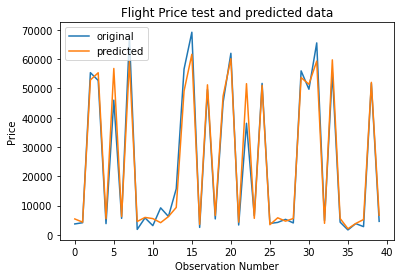

----------------------------------------
Using model: PR
Time: 7.577615175
Training Score: 0.9283395643026396
Test Score: 0.9464924561443205
r2_score: 0.9387785795873462
MSE: 31514430.65806768
RMSE: 5613.771518156726
MAE: 3724.0327114824668
----------------------------------------


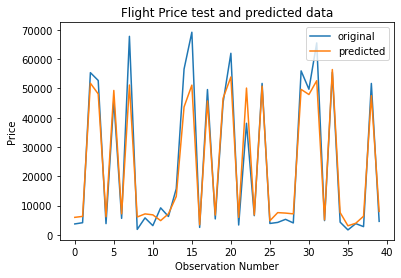

----------------------------------------
Using model: HGBR
Time: 4.063414294000001
Training Score: 0.9545747459861391
Test Score: 0.9681385276261715
r2_score: 0.9681385276261715
MSE: 16401059.54780204
RMSE: 4049.822162490847
MAE: 2287.0186325187906
----------------------------------------


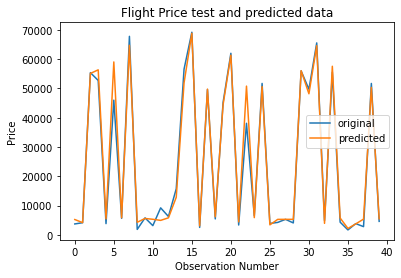

----------------------------------------
Using model: LGBMR
Time: 1.9062405789999985
Training Score: 0.9545290996166088
Test Score: 0.9679966036848501
r2_score: 0.9679966036848501
MSE: 16474116.529775761
RMSE: 4058.831916915969
MAE: 2293.0955041736183
----------------------------------------


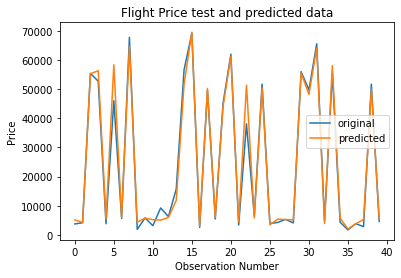

----------------------------------------
Using model: LR
Time: 0.08460339799999872
Training Score: 0.9002318722580336
Test Score: 0.9173999259294209
r2_score: 0.9173999259294209
MSE: 42519338.64165119
RMSE: 6520.685442624203
MAE: 4252.913586561596
----------------------------------------


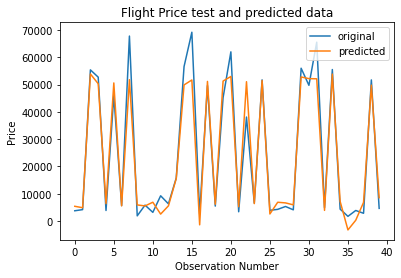

----------------------------------------
Using model: GBR
Time: 13.320372524
Training Score: 0.9446487323374263
Test Score: 0.9600524360573459
r2_score: 0.9600524360573459
MSE: 20563468.23291432
RMSE: 4534.696046364555
MAE: 2661.503713115049
----------------------------------------


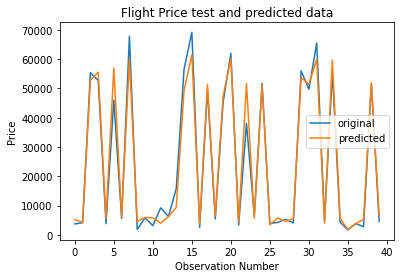

----------------------------------------
Using model: ETR
Time: 28.179784047000005
Training Score: 0.9635198297624696
Test Score: 0.9688976647888582
r2_score: 0.9688976647888582
MSE: 16010284.95759821
RMSE: 4001.285413163901
MAE: 2042.375702569385
----------------------------------------


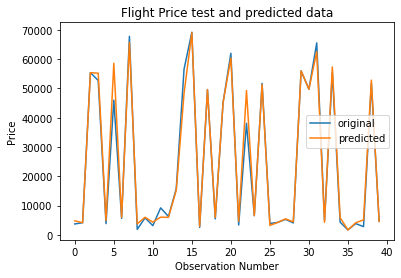

----------------------------------------
Using model: BR
Time: 3.117877676000006
Training Score: 0.9628602942927178
Test Score: 0.9685533002817299
r2_score: 0.9685533002817299
MSE: 16187550.550389782
RMSE: 4023.37551694964
MAE: 2057.6052907307258
----------------------------------------


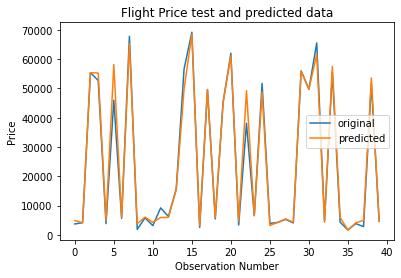

----------------------------------------
Using model: DT
Time: 0.46049010100000487
Training Score: 0.9635198588816971
Test Score: 0.9684273452388784
r2_score: 0.9684273452388784
MSE: 16252387.35811533
RMSE: 4031.4249786043806
MAE: 2053.425739104393
----------------------------------------


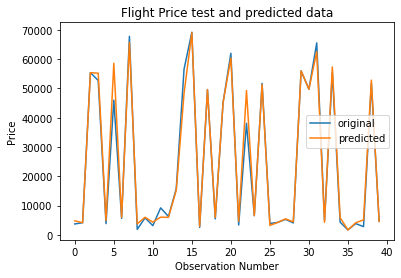

----------------------------------------
Using model: RF
Time: 30.39640525499999
Training Score: 0.9633316970409942
Test Score: 0.968878122754028
r2_score: 0.968878122754028
MSE: 16020344.444905505
RMSE: 4002.5422477352445
MAE: 2050.319243303044
----------------------------------------


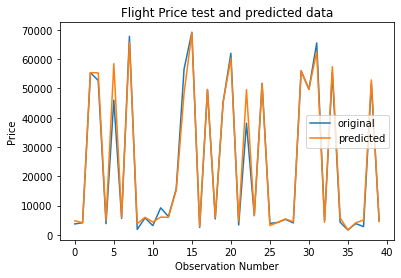

----------------------------------------


In [8]:
for name, model in models.items():
    
    start = time.process_time()
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Time: {time.process_time() - start}')

    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}') 
    
    y_pred = model.predict(x_test)
    print(f'r2_score: {r2_score(y_test,y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}')
    print(f'MAE: {mean_absolute_error(y_test,y_pred)}')

    print('-'*40)
    compare_orgin_predict(y_test,y_pred)
    print('-'*40)


